# Lab 5 - Using link functions to create generalized linear models

In [38]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
d = pd.read_csv('Airline_data.csv')
d

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [39]:
d['miles_flown_normalized'] = ((d['Miles flown [100 mln miles]'] / 1000) - (d['Miles flown [100 mln miles]'] / 1000).mean())
d.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles],miles_flown_normalized
count,10.00000,10.000000,10.000000,10.000000,1.000000e+01
mean,1980.50000,23.800000,691.900000,5715.800000,1.776357e-16
std,3.02765,4.709329,252.389228,1117.767795,1.117768e+00
min,1976.00000,16.000000,223.000000,3863.000000,-1.852800e+00
25%,1978.25000,21.250000,570.500000,5140.500000,-5.753000e-01
50%,1980.50000,23.000000,759.000000,5845.500000,1.297000e-01
75%,1982.75000,25.750000,812.750000,6175.500000,4.597000e-01
max,1985.00000,31.000000,1066.000000,7433.000000,1.717200e+00


# Prior

In [11]:
model_1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/lab_5/code_1.stan to exe file /home/lab_5/code_1
INFO:cmdstanpy:compiled model executable: /home/lab_5/code_1


In [12]:
sim = model_1.sample(iter_sampling=1000, fixed_param=True, seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [13]:
df = sim.draws_pd()
df.head()

,lp__,accept_stat__,alpha,theta,n,lambda,y
0,0.0,0.0,3.01499,0.385524,1.087250,31.00510,42.0
1,0.0,0.0,4.88040,0.291705,0.551869,154.68300,154.0
2,0.0,0.0,2.99676,0.391289,-1.819030,9.82563,16.0
3,0.0,0.0,2.76951,0.602838,0.361804,19.83830,23.0
4,0.0,0.0,3.28758,0.393650,0.729770,35.68940,33.0


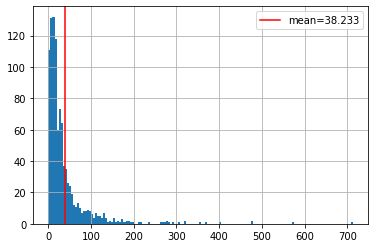

In [25]:
bins = 150
plt.hist(df.y, bins=bins)
plt.axvline(x=df.y.mean(), color='r', label=f'mean={df.y.mean()}')
plt.legend()
plt.grid()
plt.show()

In [21]:
df.y.describe()

count    1000.000000
mean       38.233000
std        58.751651
min         0.000000
25%        10.000000
50%        20.000000
75%        42.000000
max       713.000000
Name: y, dtype: float64

# Posterior

In [40]:
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [41]:
data_sim = {'N':d.shape[0], 'accidents': d['Fatal accidents'].values, 'miles': d['miles_flown_normalized'].values}

In [42]:
sim = model_2.sample(data=data_sim, seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [43]:
df = sim.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,accidents_pred[1],accidents_pred[2],accidents_pred[3],accidents_pred[4],accidents_pred[5],accidents_pred[6],accidents_pred[7],accidents_pred[8],accidents_pred[9],accidents_pred[10]
0,510.766,0.915759,0.933658,2.0,3.0,0.0,-510.172,3.19465,-0.008050,24.7683,...,25.0,27.0,26.0,31.0,20.0,30.0,33.0,18.0,26.0,23.0
1,510.824,0.789628,0.933658,2.0,3.0,0.0,-508.866,3.18000,-0.026362,25.2504,...,33.0,25.0,18.0,25.0,20.0,23.0,19.0,19.0,14.0,25.0
2,509.331,0.729928,0.933658,1.0,3.0,0.0,-508.734,3.26468,0.033292,24.6061,...,19.0,19.0,24.0,20.0,16.0,30.0,23.0,32.0,30.0,27.0
3,509.885,0.885902,0.933658,2.0,3.0,0.0,-507.474,3.07776,-0.025767,22.7714,...,21.0,26.0,20.0,14.0,22.0,22.0,17.0,19.0,16.0,15.0
4,510.795,0.975384,0.933658,1.0,3.0,0.0,-509.613,3.16505,-0.035640,25.3070,...,27.0,13.0,19.0,27.0,25.0,19.0,38.0,19.0,24.0,19.0


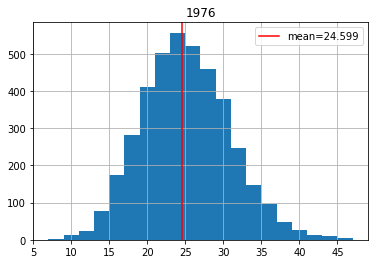

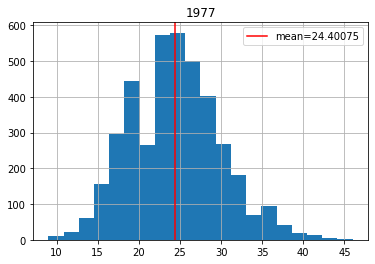

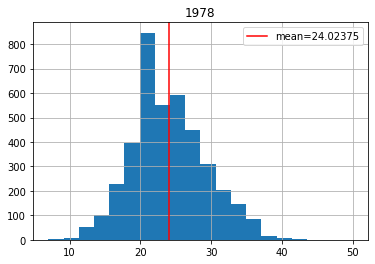

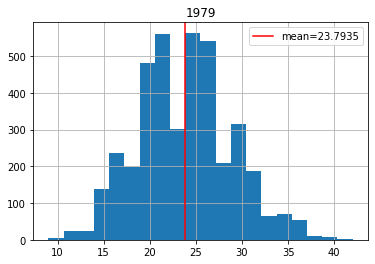

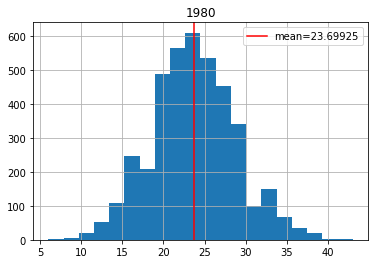

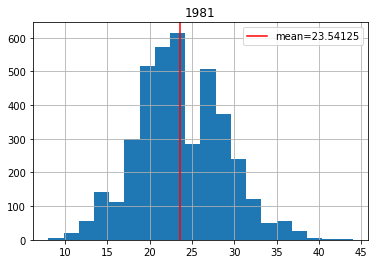

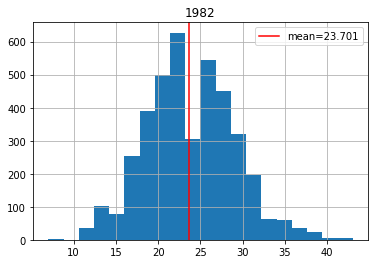

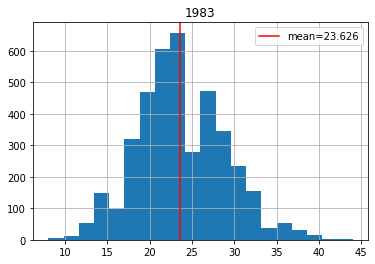

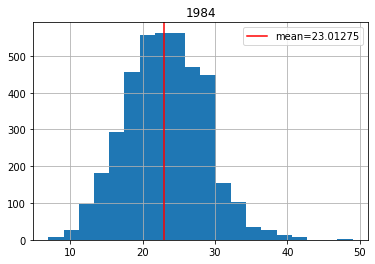

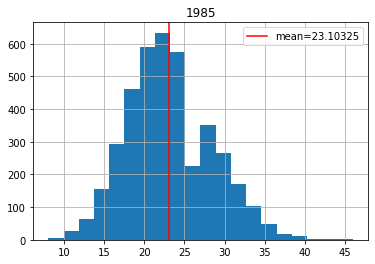

In [52]:
for idx, year in enumerate(d.Year, start=1):
    bins = 20
    plt.hist(df[f'accidents_pred[{idx}]'], bins=bins)
    plt.axvline(x=df[f'accidents_pred[{idx}]'].mean(), color='r', label=f'mean={df[f"accidents_pred[{idx}]"].mean()}')
    plt.title(year)
    plt.legend()
    plt.grid()
    plt.show()

## replacing single intercept alpha with individual intercepts of alpha_i for each year

In [55]:
model_3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [56]:
sim = model_3.sample(data=data_sim, seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [57]:
df = sim.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,accidents_pred[1],accidents_pred[2],accidents_pred[3],accidents_pred[4],accidents_pred[5],accidents_pred[6],accidents_pred[7],accidents_pred[8],accidents_pred[9],accidents_pred[10]
0,514.908,0.903745,0.31308,4.0,15.0,0.0,-507.841,3.88824,3.98787,3.58680,...,24.0,32.0,29.0,39.0,11.0,15.0,30.0,16.0,20.0,24.0
1,515.640,0.994932,0.31308,3.0,15.0,0.0,-511.122,3.77443,3.70710,3.64787,...,31.0,27.0,37.0,36.0,16.0,18.0,36.0,17.0,14.0,28.0
2,510.485,0.860002,0.31308,3.0,15.0,0.0,-507.404,4.16838,3.70990,3.60868,...,38.0,29.0,20.0,21.0,17.0,18.0,32.0,33.0,17.0,31.0
3,515.442,1.000000,0.31308,3.0,7.0,0.0,-509.115,3.53288,3.79163,3.72495,...,13.0,28.0,37.0,36.0,19.0,14.0,19.0,13.0,24.0,18.0
4,514.006,0.924271,0.31308,4.0,15.0,0.0,-508.551,3.36400,3.64726,3.45144,...,19.0,28.0,20.0,24.0,28.0,26.0,35.0,10.0,12.0,24.0


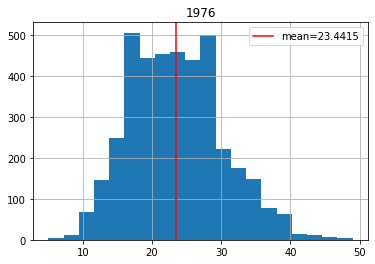

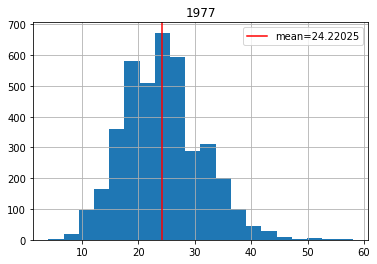

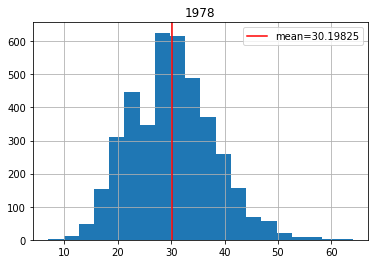

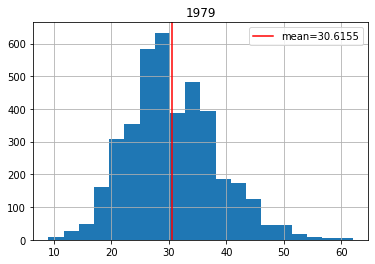

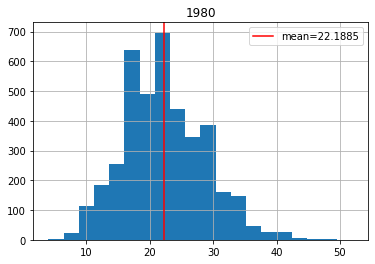

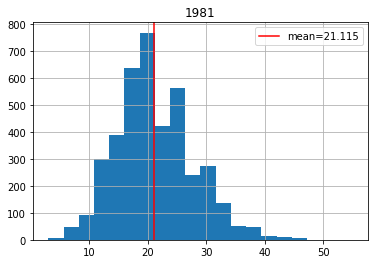

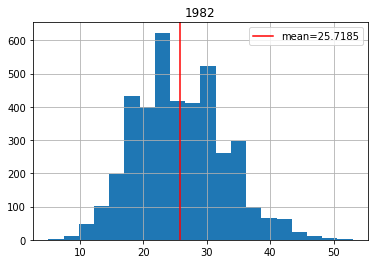

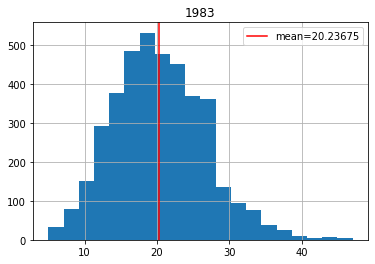

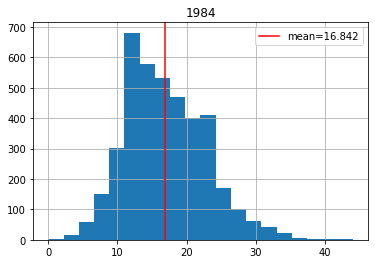

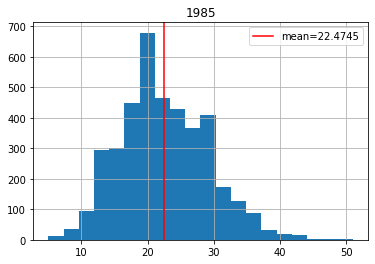

In [58]:
for idx, year in enumerate(d.Year, start=1):
    bins = 20
    plt.hist(df[f'accidents_pred[{idx}]'], bins=bins)
    plt.axvline(x=df[f'accidents_pred[{idx}]'].mean(), color='r', label=f'mean={df[f"accidents_pred[{idx}]"].mean()}')
    plt.title(year)
    plt.legend()
    plt.grid()
    plt.show()

After replacing single intercept alpha with individual intercepts of alpha_i for each year model performs more accurately.